In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [103]:
df = pd.read_csv('data.csv', encoding='windows-1252')
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,3312.000000,3312.000000,3312.000000,3312.000000,3312.000000,3312.000000
mean,5087.107488,56186.515097,221.381418,3.766908,0.156467,28.212340
std,2817.482266,31980.375516,585.257531,2.221776,0.207429,241.864342
min,13.000000,1841.000000,0.444000,1.000000,0.000000,-3839.990400
25%,2655.750000,27978.750000,17.018000,2.000000,0.000000,1.763200
50%,5183.500000,60472.500000,53.810000,3.000000,0.200000,8.296800
75%,7498.250000,90032.000000,205.105700,5.000000,0.200000,28.315125
max,9994.000000,99301.000000,13999.960000,14.000000,0.800000,6719.980800


23.370897252747252
8.236


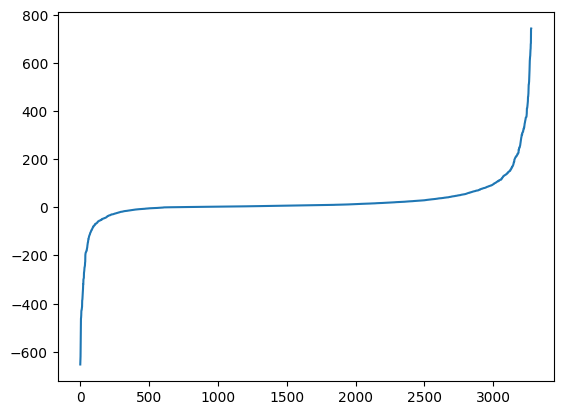

In [83]:
l = []
m = df['Profit'].mean()
std = df['Profit'].std()
df = df[(df['Profit'] <= m + 3 * std) & (df['Profit'] >= m - 3 * std)]
plt.plot(sorted(df['Profit']))
print(df['Profit'].mean())
print(df['Profit'].median())

In [15]:
df.columns

Index(['Order Date', 'Row ID', 'Order ID', 'Ship Mode', 'Customer ID',
       'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales',
       'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [14]:
df.isna().sum().sum()

0

In [47]:
df.columns

Index(['Order Date', 'Row ID', 'Order ID', 'Ship Mode', 'Customer ID',
       'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales',
       'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [18]:
print(df.shape)
print(len(df['Customer ID'].unique()))
print(len(df['Sub-Category'].unique()))
print(len(df['Product Name'].unique()))

(3312, 19)
693
17
1511


(array([203., 163., 154.,  94.,  41.,  19.,   8.,   6.,   1.,   4.]),
 array([ 1. ,  2.9,  4.8,  6.7,  8.6, 10.5, 12.4, 14.3, 16.2, 18.1, 20. ]),
 <BarContainer object of 10 artists>)

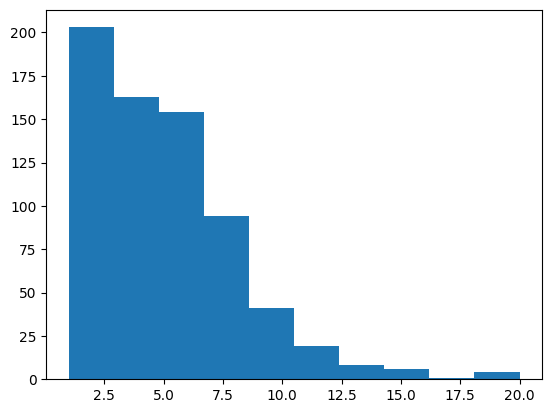

In [23]:
l = []
for i in df['Customer ID'].unique():
    l.append(len(df[df['Customer ID'] == i]))
plt.hist(l)

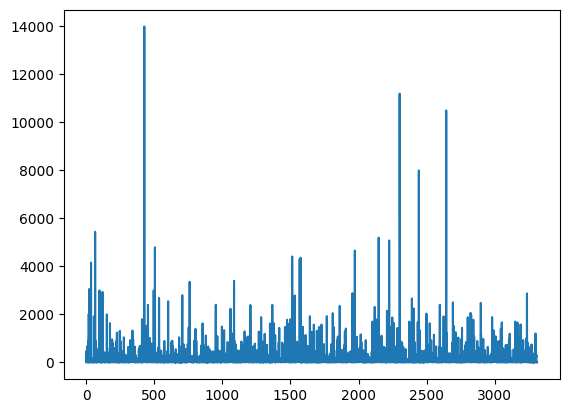

In [45]:
l = []
plt.plot((df['Sales']))

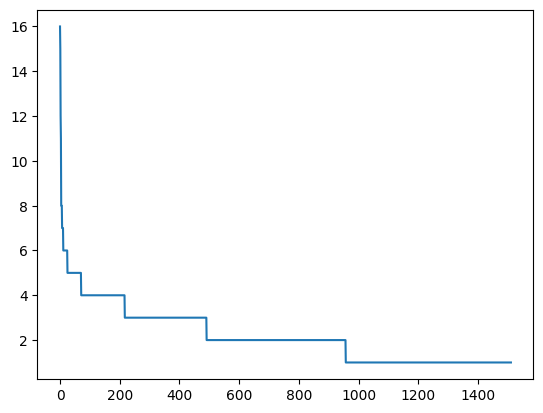

In [31]:
d = {}
for i in df['Product Name'].unique():
    d[i] = (len(df[df['Product Name'] == i]))
plt.plot(sorted(d.values(), reverse=True))

<Axes: xlabel='Sub-Category'>

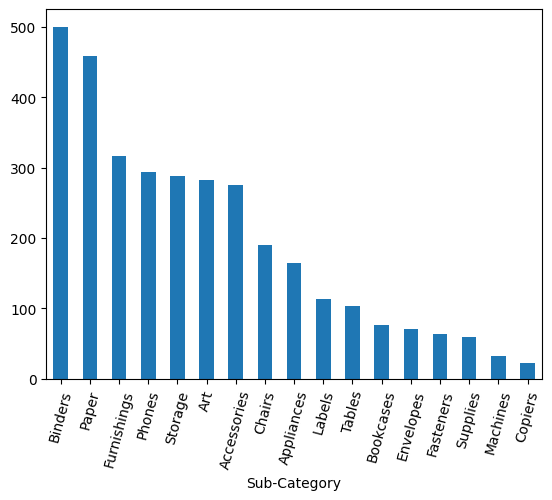

In [38]:
df['Sub-Category'].value_counts().plot(kind='bar', rot=75)

C:\Users\janst\AppData\Local\Temp\ipykernel_12608\1156072815.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'])


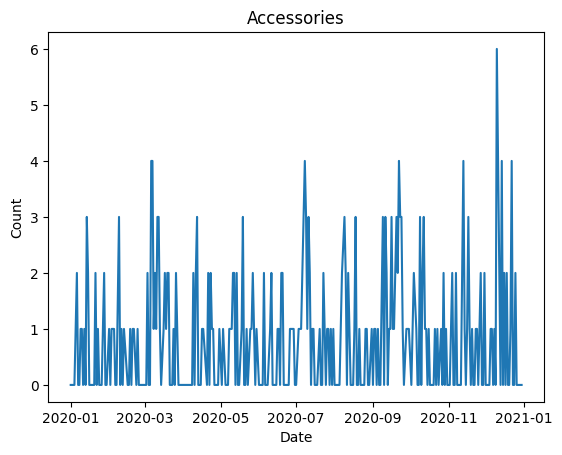

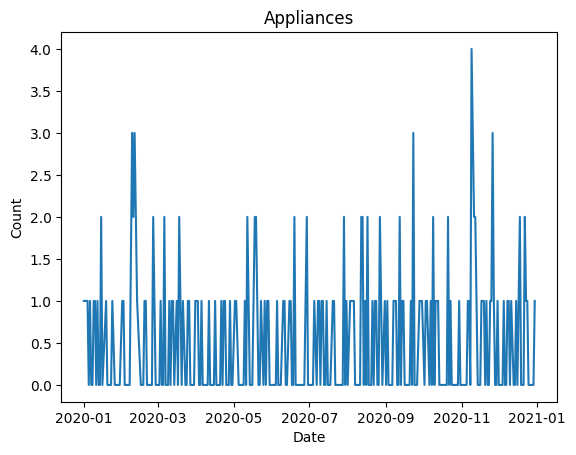

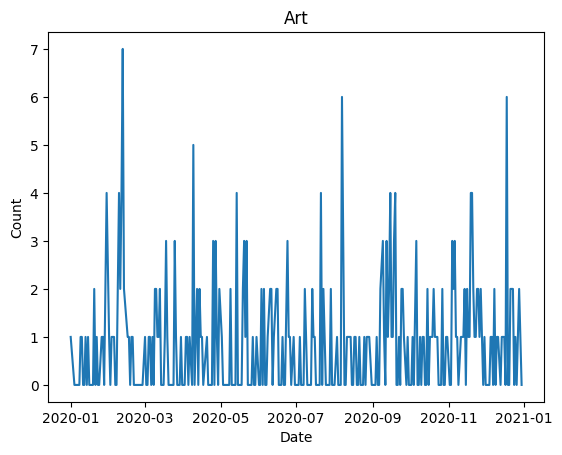

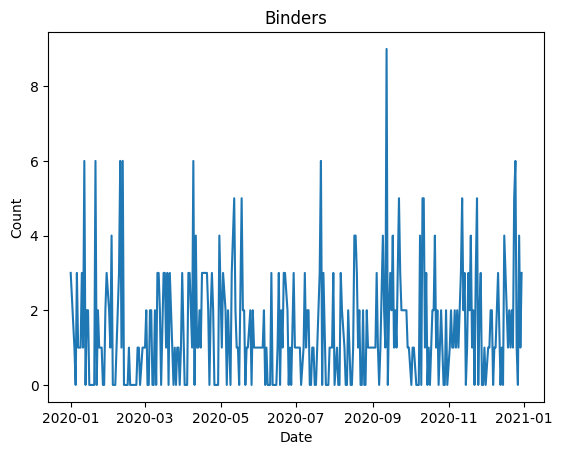

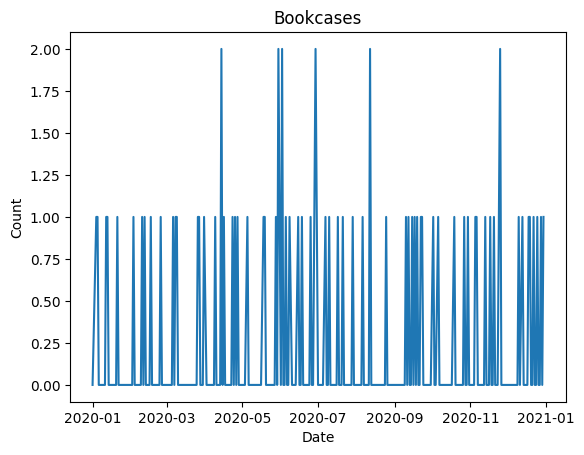

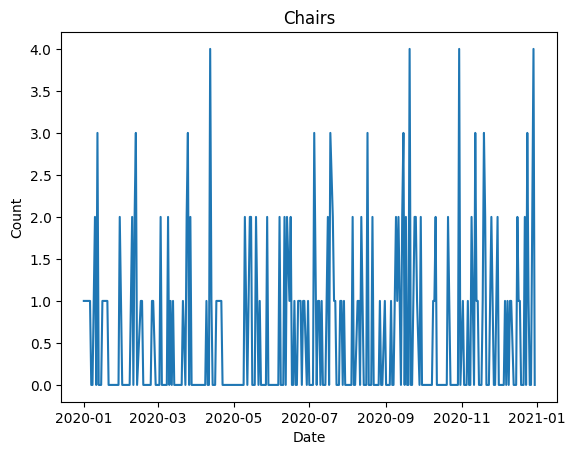

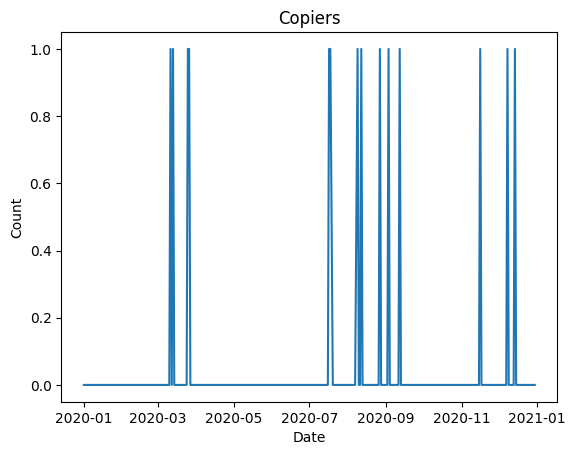

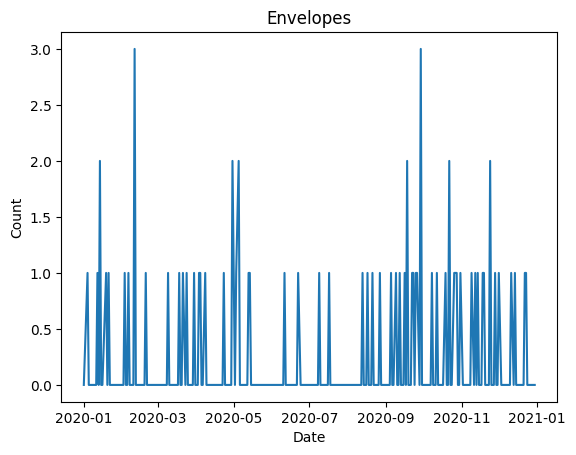

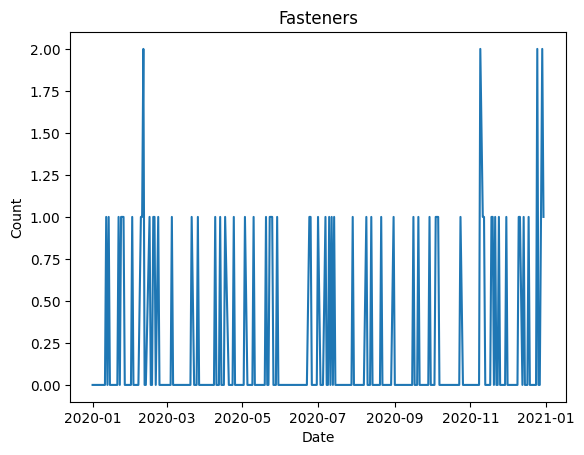

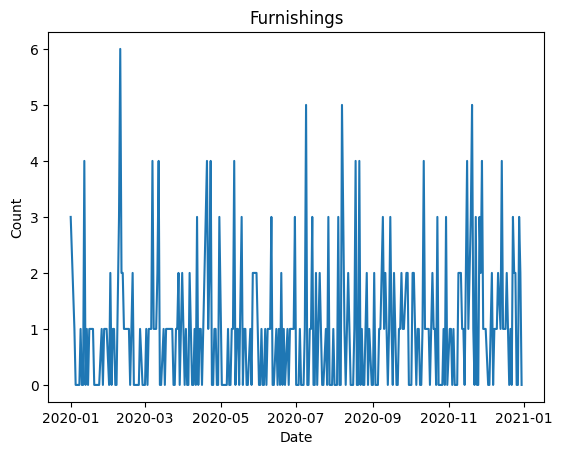

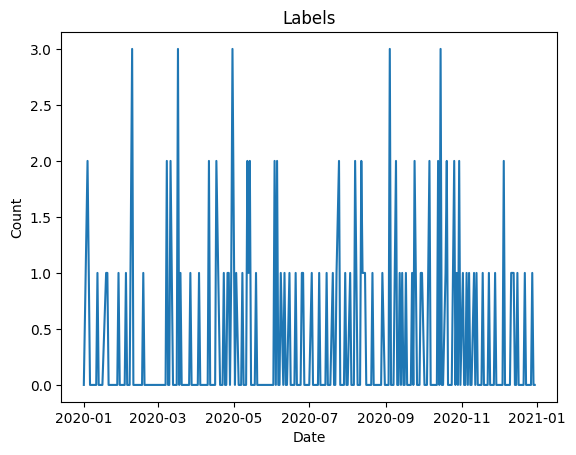

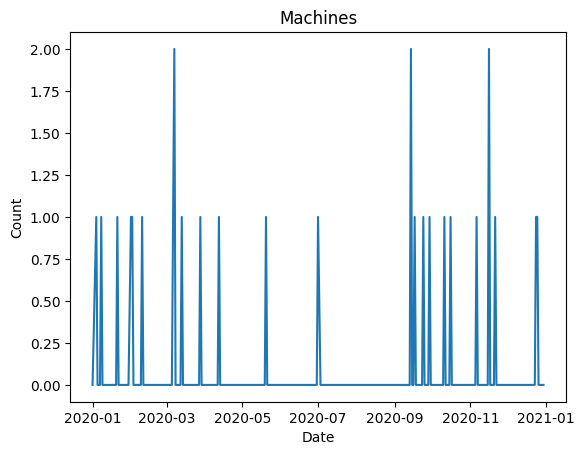

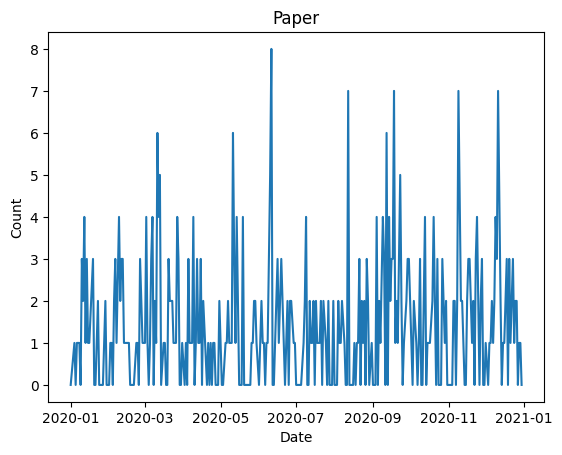

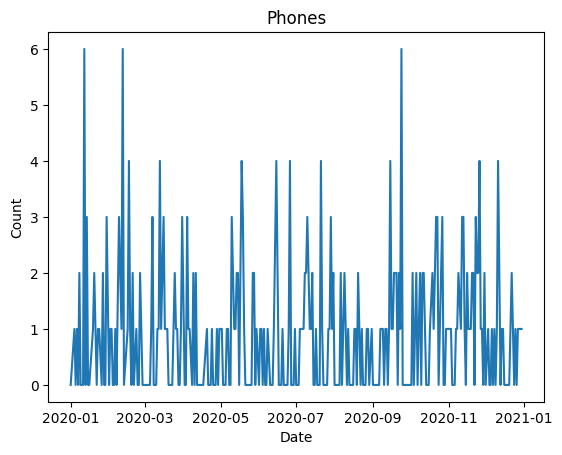

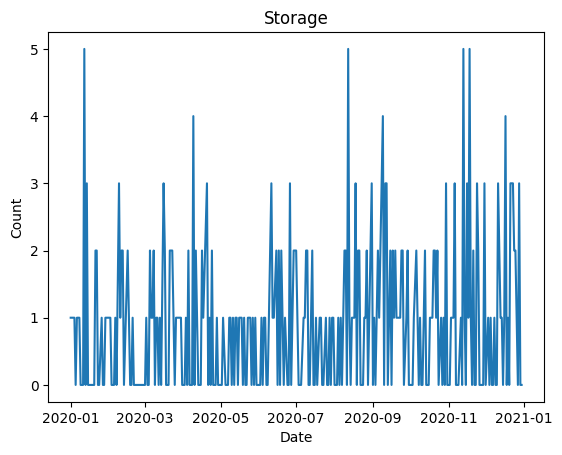

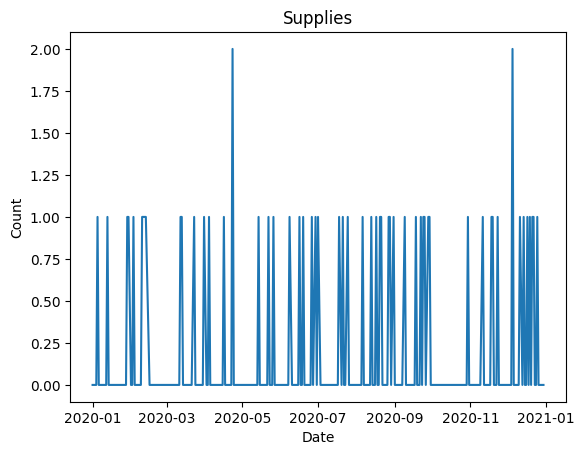

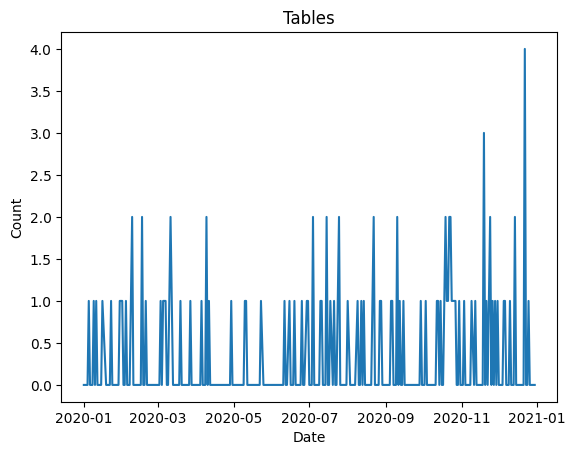

In [86]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
counts = df.groupby([df['Order Date'].dt.date, 'Sub-Category']).size().unstack(fill_value=0)

# Plot
for category in counts.columns:
    plt.plot(counts.index, counts[category], label=category)
    plt.title(category)
    plt.xlabel('Date')
    plt.ylabel('Count')
    plt.show()

In [101]:
def rem_out(df):
    m = df['Sales'].mean()
    std = df['Sales'].std()
    df = df[(df['Sales'] <= m + 2.5 * std) & (df['Sales'] >= m - 2.5 * std)]
    return df

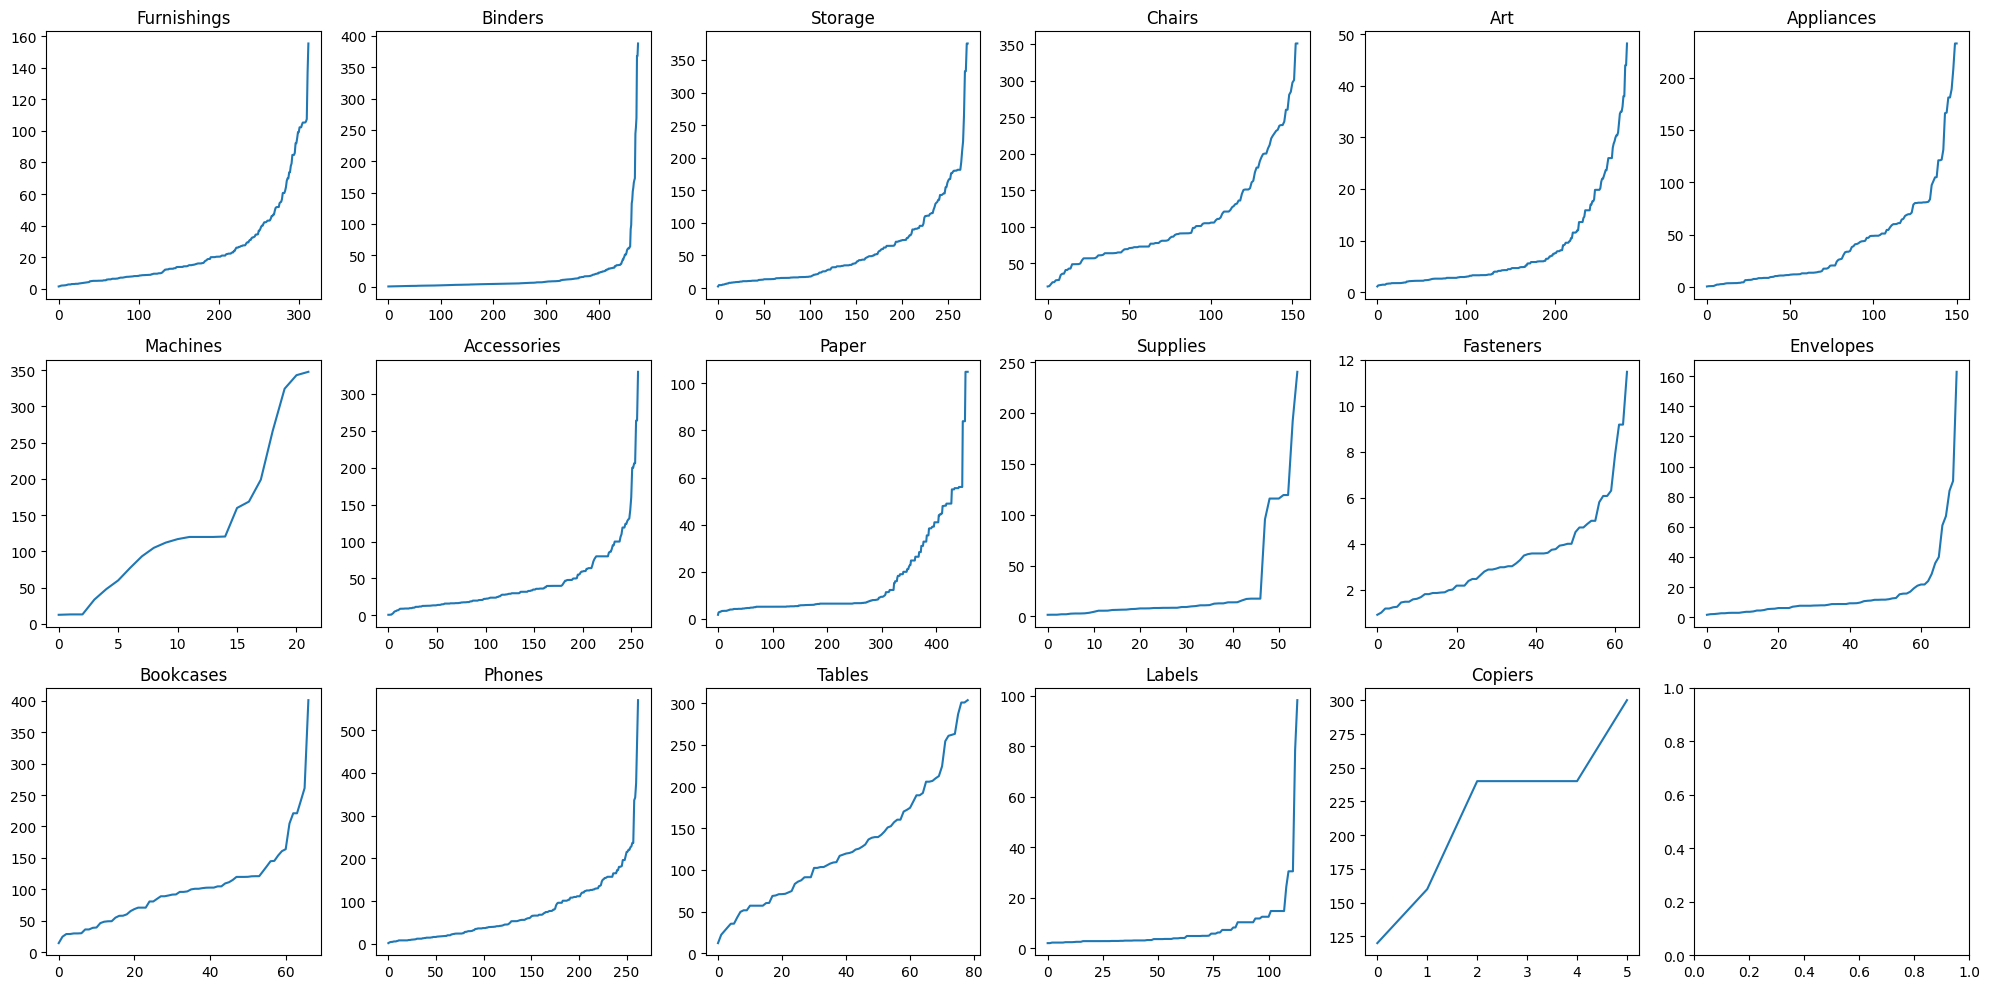

In [104]:
fig, axes = plt.subplots(3, 6, figsize=(20, 10))
df = rem_out(df)
for i, c in enumerate(df['Sub-Category'].unique()):
    ax = axes[i // 6, i % 6]
    a = df[df['Sub-Category'] == c]['Sales']
    b = df[df['Sub-Category'] == c]['Quantity']
    ax.plot(sorted(a / b))
    ax.set_title(c)
plt.tight_layout()
plt.show()

In [97]:
df.columns

Index(['Order Date', 'Row ID', 'Order ID', 'Ship Mode', 'Customer ID',
       'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales',
       'Quantity', 'Discount', 'Profit'],
      dtype='object')